In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('tips')

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## data visualization

In [9]:
a = df['sex'].value_counts()
lav = ['Male','Female']
col = ['red','green']
ex = [0,0.08]

([<matplotlib.patches.Wedge at 0x1337ad0d0>,
 [Text(-0.4790943765327388, 0.9901861331965351, 'Male'),
  Text(0.5139374435292441, -1.0621997477586902, 'Female')],
 [Text(-0.26132420538149387, 0.54010152719811, '64.3%'),
  Text(0.2961673403388864, -0.6121151088778892, '35.7%')])

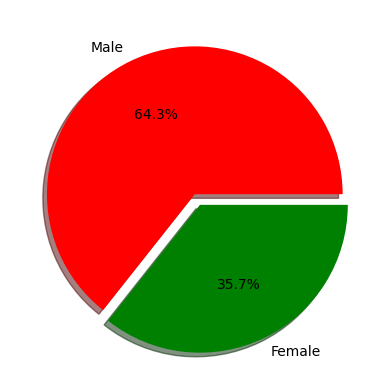

In [10]:
plt.pie(a,labels=lav,colors=col,shadow=True,autopct="%1.1f%%",explode=ex)

In [11]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [12]:
x = df['time'].value_counts()
lav1 = ['Dinner','Lunch']
col1 = ['blue','gray']
exp = [0,0.08]

([<matplotlib.patches.Wedge at 0x13389b170>,
 [Text(-0.7046524606945154, 0.8446685205671896, 'Dinner'),
  Text(0.7558999915950763, -0.9060988923437464, 'Lunch')],
 [Text(-0.38435588765155376, 0.4607282839457397, '72.1%'),
  Text(0.435603384986993, -0.5221586837235148, '27.9%')])

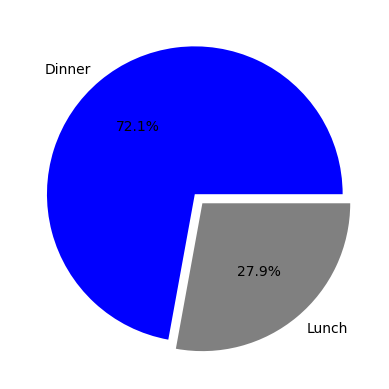

In [13]:
plt.pie(x,labels=lav1,colors=col1,explode=exp,autopct="%1.1f%%")

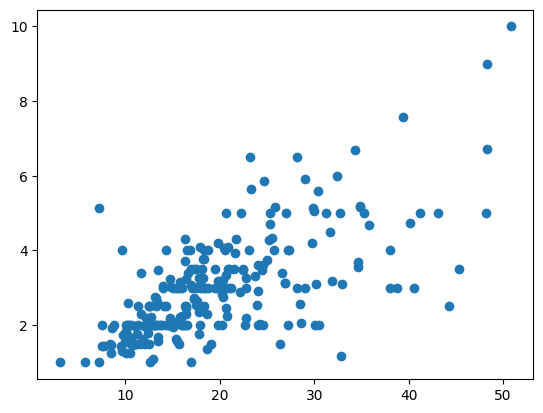

In [14]:
plt.scatter(x=df['total_bill'],y=df['tip'])

In [15]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [16]:
df['sex'] = np.where(df['sex'].str.contains('Female'),1,0)

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,No,Sun,Dinner,2
1,10.34,1.66,0,No,Sun,Dinner,3
2,21.01,3.50,0,No,Sun,Dinner,3
3,23.68,3.31,0,No,Sun,Dinner,2
4,24.59,3.61,1,No,Sun,Dinner,4


In [18]:
df['smoker'] = np.where(df['smoker'].str.contains('No'),0,1)

In [19]:
df = df.drop('day',axis=1)

In [20]:
df['time'] = np.where(df['time'].str.contains('Dinner'),0,1)

In [21]:
df['time'].value_counts()

time
0    176
1     68
Name: count, dtype: int64

In [22]:
df.head()

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,1,0,0,2
1,10.34,1.66,0,0,0,3
2,21.01,3.50,0,0,0,3
3,23.68,3.31,0,0,0,2
4,24.59,3.61,1,0,0,4


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   time        244 non-null    int64  
 5   size        244 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 11.6 KB


In [24]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

## divide the data to dependent and independent feature

In [25]:
X = df.drop('tip',axis=1)
y = df['tip']

In [26]:
df.shape

(244, 6)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.linear_model import ElasticNet
ele = ElasticNet()
ele.fit(X_train,y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [30]:
df.head()

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,1,0,0,2
1,10.34,1.66,0,0,0,3
2,21.01,3.50,0,0,0,3
3,23.68,3.31,0,0,0,2
4,24.59,3.61,1,0,0,4


In [31]:
ele.predict(sc.transform(np.array([[16.99,1,0,0,2]])))

/Users/apple/AI_ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2.915894])

In [32]:
from sklearn.metrics import r2_score
y_pred = ele.predict(X_test)
score = r2_score(y_test,y_pred)


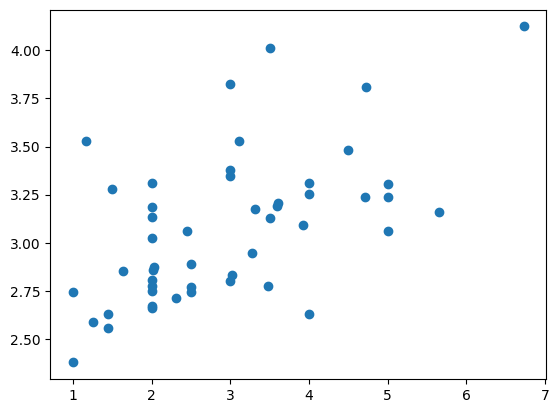

In [33]:
plt.scatter(y_test,y_pred)

In [35]:
if score>95:
    print('Model is well train')
else:
    print ('Model is not well train')

Model is not well train
